# **Fedex Logistics Operations Analysis**

In [129]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset


In [48]:
df = pd.read_csv('Fedex_Delivery_History_Dataset.csv')
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


# Dataset Information

In [49]:
df.shape

(10324, 33)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [53]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


# Data Cleaning

In [54]:
common_shipment_mode = df['Shipment Mode'].mode()
df['Shipment Mode'].fillna(common_shipment_mode, inplace = True)

/tmp/ipykernel_212109/249265845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shipment Mode'].fillna(common_shipment_mode, inplace = True)


In [55]:
print(df['Dosage'])
df['Dosage'].fillna('1mg', inplace = True)
print(df['Dosage'])

0                  NaN
1              10mg/ml
2                  NaN
3                150mg
4                 30mg
             ...      
10319       30/50/60mg
10320        150/300mg
10321    600/300/300mg
10322        150/300mg
10323          30/60mg
Name: Dosage, Length: 10324, dtype: object
0                  1mg
1              10mg/ml
2                  1mg
3                150mg
4                 30mg
             ...      
10319       30/50/60mg
10320        150/300mg
10321    600/300/300mg
10322        150/300mg
10323          30/60mg
Name: Dosage, Length: 10324, dtype: object


/tmp/ipykernel_212109/3974087625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dosage'].fillna('1mg', inplace = True)


In [56]:
print(df['Line Item Insurance (USD)'])
df['Line Item Insurance (USD)'].fillna(0, inplace = True)
print(df['Line Item Insurance (USD)'])


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
10319     705.79
10320     161.71
10321    5284.04
10322     134.03
10323      85.82
Name: Line Item Insurance (USD), Length: 10324, dtype: float64
0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
          ...   
10319     705.79
10320     161.71
10321    5284.04
10322     134.03
10323      85.82
Name: Line Item Insurance (USD), Length: 10324, dtype: float64


/tmp/ipykernel_212109/3781873552.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Line Item Insurance (USD)'].fillna(0, inplace = True)


In [57]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10319    False
10320    False
10321    False
10322    False
10323    False
Length: 10324, dtype: bool

In [64]:
date_columns = ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 
                'Scheduled Delivery Date', 'Delivered to Client Date', 
                'Delivery Recorded Date']

for c in date_columns:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df[['PQ First Sent to Client Date', 'PO Sent to Vendor Date']]

,PQ First Sent to Client Date,PO Sent to Vendor Date
0,NaT,NaT
1,NaT,NaT
2,NaT,NaT
3,NaT,NaT
4,NaT,NaT
...,...,...
10319,2014-10-16,NaT
10320,2014-10-24,NaT
10321,2014-08-12,NaT
10322,2015-07-01,NaT


In [70]:
numeric_columns = ['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', 
                   'Freight Cost (USD)', 'Line Item Insurance (USD)']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


print(df.info())

df[['Line Item Quantity', 'Line Item Value']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 9964 non-null   object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

,Line Item Quantity,Line Item Value
0,19,551.00
1,1000,6200.00
2,500,40000.00
3,31920,127360.80
4,38000,121600.00
...,...,...
10319,166571,599655.60
10320,21072,137389.44
10321,514526,5140114.74
10322,17465,113871.80


# Data Visualization 

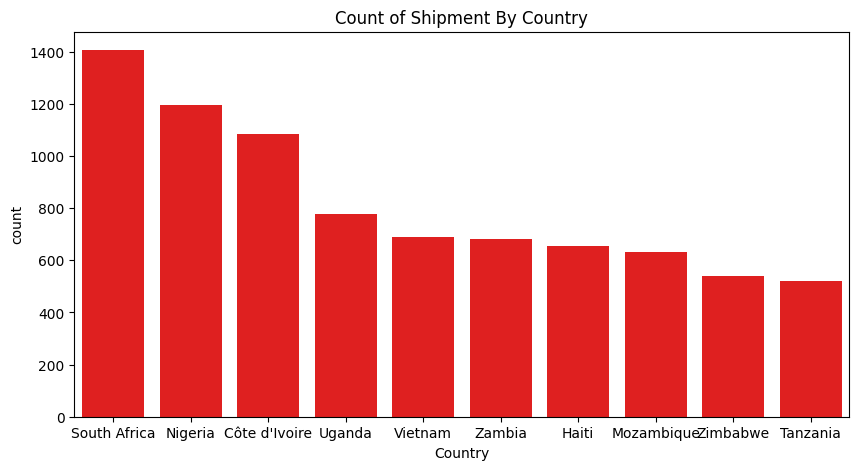

In [86]:
plt.subplots(1,1,figsize=(10, 5))
sns.countplot(x = df['Country'], order = df['Country'].value_counts().nlargest(10).index, data = df, color='red')
plt.title('Count of Shipment By Country')
plt.show()

In [106]:
# Bar graph insights

'''
Based on the shipment count, it's evident that South African countris with the highest volume of orders being shipped. After that closely behind 
are Nigeria and Cote d Ivoire, and at least are Zimbabwe and Tanzania which also see significant shipment activity. This trend indicates a diverse global trade landscape with strong regional markets.
'''

"\nBased on the shipment count, it's evident that South African countris with the highest volume of orders being shipped. After that closely behind \nare Nigeria and Cote d Ivoire, and at least are Zimbabwe and Tanzania which also see significant shipment activity. This trend indicates a diverse global trade landscape with strong regional markets.\n"

In [91]:
shipment_mode_counts = df['Shipment Mode'].value_counts()
print(shipment_mode_counts)

Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64


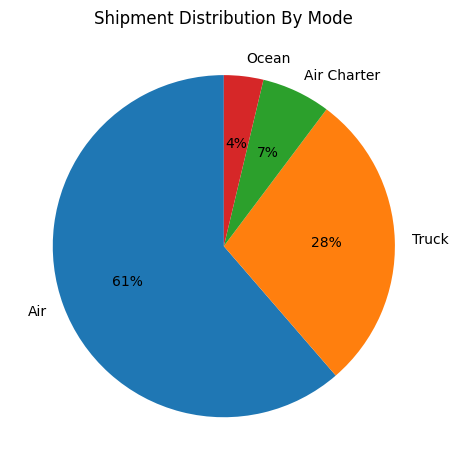

In [105]:

plt.pie(shipment_mode_counts, labels=shipment_mode_counts.index, autopct='%.0f%%', startangle=90)
plt.title('Shipment Distribution By Mode')

plt.tight_layout()
plt.show()

In [109]:
# Pie Chart Conclusion

'''
It is clear that more than 61% of shipments are delivered by air, indicating a strong preference for this mode of transportation due to its speed and efficiency. 
Following air transport, trucking accounts for 28% of the deliveries, suggesting that it plays a significant role in domestic distribution.
'''

'\nIt is clear that more than 61% of shipments are delivered by air, indicating a strong preference for this mode of transportation due to its speed and efficiency. \nFollowing air transport, trucking accounts for 28% of the deliveries, suggesting that it plays a significant role in domestic distribution.\n'

<Axes: xlabel='Line Item Quantity', ylabel='Count'>

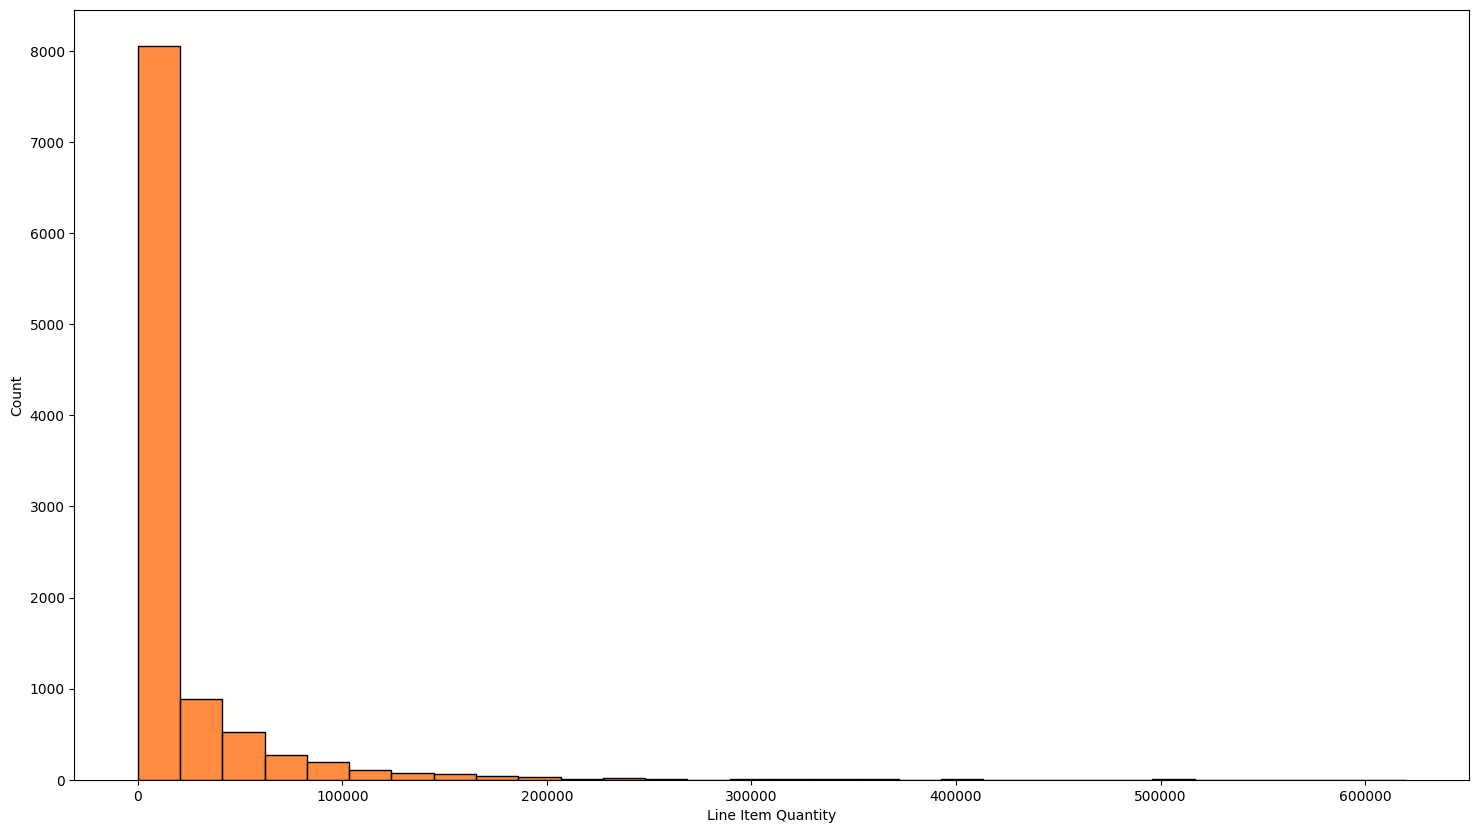

In [115]:

count_line_quantity = df['Line Item Quantity'].value_counts()

plt.subplots(1, 1, figsize=(18, 10))

# Plot histogram
sns.histplot(x='Line Item Quantity', data=df, bins=30, color='#ff6600')


In [116]:
# The distribution shows the most common quantities

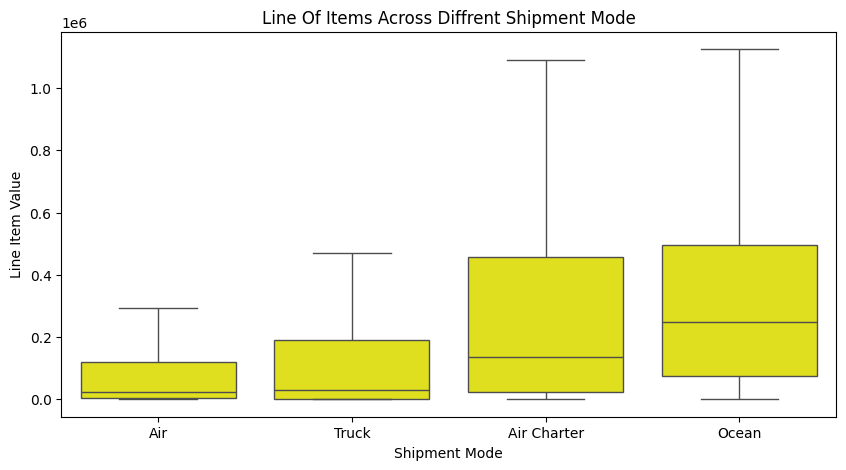

In [127]:
plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x = 'Shipment Mode' , y = 'Line Item Value',color= 'yellow', data = df,showfliers = False)
plt.title('Line Of Items Across Diffrent Shipment Mode')
plt.show()

In [128]:
# Conclusion of the Boxplot

'''
The box plot visualizes the distribution of items across different shipment modes. It shows that FedEx has the highest median number of items shipped, 
followed by Truck and Air Charter.  The outlier for Other suggests a significantly higher number of items shipped in one or more months.
'''

'\nThe box plot visualizes the distribution of items across different shipment modes. It shows that FedEx has the highest median number of items shipped, \nfollowed by Truck and Air Charter.  The outlier for Other suggests a significantly higher number of items shipped in one or more months.\n'

# Conclusion

This analysis provides FedEx Logistics with actionable insights into their operations. By identifying the key factors driving costs, delays, and vendor performance, the company can implement targeted improvements to optimize its global supply chain. The univariate analyses collectively gives understanding of the logistics operations performance, enabling FedEx to enhance efficiency.